In [6]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import time
import copy

''' ================= initialization setting ======================'''


pt_tmp=pd.read_excel("JSP_dataset.xlsx",sheet_name="Processing Time",index_col =[0])
ms_tmp=pd.read_excel("JSP_dataset.xlsx",sheet_name="Machines Sequence",index_col =[0])

dfshape=pt_tmp.shape
num_mc=dfshape[1] # number of machines
num_job=dfshape[0] # number of jobs
num_gene=num_mc*num_job # number of genes in a chromosome

pt=[list(map(int, pt_tmp.iloc[i])) for i in range(num_job)]
ms=[list(map(int,ms_tmp.iloc[i])) for i in range(num_job)]




# raw_input is used in python 2
population_size_list=[5,10,20,30]
crossover_rate_list=[0.2,0.4,0.6,0.8]
population_size=60#int(input('Please input the size of population: ') or 30) # default value is 30
crossover_rate=0.8#float(input('Please input the size of Crossover Rate: ') or 0.8) # default value is 0.8
mutation_rate=0.2#float(input('Please input the size of Mutation Rate: ') or 0.2) # default value is 0.2
mutation_selection_rate=0.2#float(input('Please input the mutation selection rate: ') or 0.2)
num_mutation_jobs=round(num_gene*mutation_selection_rate)
num_iteration=500#int(input('Please input number of iteration: ') or 2000) # default value is 2000
    
start_time = time.time()

'''==================== main code ==============================='''
'''----- generate initial population -----'''
Tbest=9999999999
best_list,best_obj=[],[]
population_list=[]
makespan_record=[]
for i in range(population_size):
    nxm_random_num=list(np.random.permutation(num_gene)) # generate a random permutation of 0 to num_job*num_mc-1
    population_list.append(nxm_random_num) # add to the population_list
    for j in range(num_gene):
        population_list[i][j]=population_list[i][j]%num_job # convert to job number format, every job appears m times
        



In [7]:
cutpoint=list(np.random.choice(num_gene, 2, replace=False))
#cutpoint
#print (cutpoint.sort())
m_chg=list(np.random.choice(num_gene, num_mutation_jobs, replace=False)) 
print (m_chg)
print (num_gene)
print (num_mutation_jobs)

[67, 13, 94, 29, 0, 4, 45, 78, 49, 68, 65, 53, 61, 1, 57, 95, 12, 88, 30, 24]
100
20


optimal sequence [4, 9, 6, 6, 1, 6, 1, 1, 2, 2, 1, 1, 9, 9, 6, 3, 8, 9, 3, 6, 3, 4, 0, 8, 9, 0, 9, 6, 2, 7, 4, 1, 8, 4, 7, 2, 1, 8, 2, 3, 5, 4, 5, 8, 5, 2, 5, 7, 7, 6, 6, 6, 9, 3, 0, 2, 3, 4, 6, 5, 0, 8, 3, 3, 7, 5, 4, 8, 5, 7, 7, 0, 8, 4, 1, 8, 9, 7, 5, 5, 7, 1, 8, 0, 4, 0, 0, 5, 3, 3, 0, 1, 4, 2, 2, 7, 9, 2, 9, 0]
optimal value:1210.000000
the elapsed time:46.99112153053284


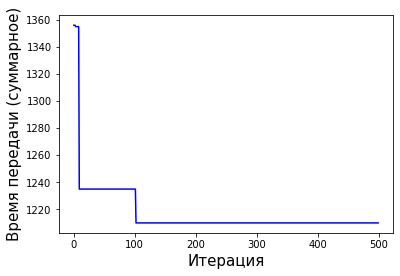

In [8]:
for n in range(num_iteration):
    Tbest_now=99999999 
   
    '''-------- two point crossover --------'''
    parent_list=copy.deepcopy(population_list)
    offspring_list=copy.deepcopy(population_list)
    S=list(np.random.permutation(population_size)) # generate a random sequence to select the parent chromosome to crossover
    
    for m in range(int(population_size/2)):
        crossover_prob=np.random.rand()
        if crossover_rate>=crossover_prob:
            parent_1= population_list[S[2*m]][:]
            parent_2= population_list[S[2*m+1]][:]
            child_1=parent_1[:]
            child_2=parent_2[:]
            cutpoint=list(np.random.choice(num_gene, 2, replace=False))
            cutpoint.sort()
        
            child_1[cutpoint[0]:cutpoint[1]]=parent_2[cutpoint[0]:cutpoint[1]]
            child_2[cutpoint[0]:cutpoint[1]]=parent_1[cutpoint[0]:cutpoint[1]]
            offspring_list[S[2*m]]=child_1[:]
            offspring_list[S[2*m+1]]=child_2[:]
        
    
    '''----------repairment-------------'''
    for m in range(population_size):
        job_count={}
        larger,less=[],[] # 'larger' record jobs appear in the chromosome more than m times, and 'less' records less than m times.
        for i in range(num_job):
            if i in offspring_list[m]:
                count=offspring_list[m].count(i)
                pos=offspring_list[m].index(i)
                job_count[i]=[count,pos] # store the above two values to the job_count dictionary
            else:
                count=0
                job_count[i]=[count,0]
            if count>num_mc:
                larger.append(i)
            elif count<num_mc:
                less.append(i)
                
        for k in range(len(larger)):
            chg_job=larger[k]
            while job_count[chg_job][0]>num_mc:
                for d in range(len(less)):
                    if job_count[less[d]][0]<num_mc:                    
                        offspring_list[m][job_count[chg_job][1]]=less[d]
                        job_count[chg_job][1]=offspring_list[m].index(chg_job)
                        job_count[chg_job][0]=job_count[chg_job][0]-1
                        job_count[less[d]][0]=job_count[less[d]][0]+1                    
                    if job_count[chg_job][0]==num_mc:
                        break     
    
    '''--------mutatuon--------'''   
    for m in range(len(offspring_list)):
        mutation_prob=np.random.rand()
        if mutation_rate >= mutation_prob:
            m_chg=list(np.random.choice(num_gene, num_mutation_jobs, replace=False)) # chooses the position to mutation
            t_value_last=offspring_list[m][m_chg[0]] # save the value which is on the first mutation position
            for i in range(num_mutation_jobs-1):
                offspring_list[m][m_chg[i]]=offspring_list[m][m_chg[i+1]] # displacement
            
            offspring_list[m][m_chg[num_mutation_jobs-1]]=t_value_last # move the value of the first mutation position to the last mutation position
  
    
    '''--------fitness value(calculate makespan)-------------'''
    total_chromosome=copy.deepcopy(parent_list)+copy.deepcopy(offspring_list) # parent and offspring chromosomes combination
    chrom_fitness,chrom_fit=[],[]
    total_fitness=0
    for m in range(population_size*2):
        j_keys=[j for j in range(num_job)]
        key_count={key:0 for key in j_keys}
        j_count={key:0 for key in j_keys}
        m_keys=[j+1 for j in range(num_mc)]
        m_count={key:0 for key in m_keys}
        
        for i in total_chromosome[m]:
            gen_t=int(pt[i][key_count[i]])
            gen_m=int(ms[i][key_count[i]])
            j_count[i]=j_count[i]+gen_t
            m_count[gen_m]=m_count[gen_m]+gen_t
            
            if m_count[gen_m]<j_count[i]:
                m_count[gen_m]=j_count[i]
            elif m_count[gen_m]>j_count[i]:
                j_count[i]=m_count[gen_m]
            
            key_count[i]=key_count[i]+1
    
        makespan=max(j_count.values())
        chrom_fitness.append(1/makespan)
        chrom_fit.append(makespan)
        total_fitness=total_fitness+chrom_fitness[m]

    
    '''----------selection(roulette wheel approach)----------'''
    pk,qk=[],[]
    
    for i in range(population_size*2):
        pk.append(chrom_fitness[i]/total_fitness)
    for i in range(population_size*2):
        cumulative=0
        for j in range(0,i+1):
            cumulative=cumulative+pk[j]
        qk.append(cumulative)
    
    selection_rand=[np.random.rand() for i in range(population_size)]
    
    for i in range(population_size):
        if selection_rand[i]<=qk[0]:
            population_list[i]=copy.deepcopy(total_chromosome[0])
        else:
            for j in range(0,population_size*2-1):
                if selection_rand[i]>qk[j] and selection_rand[i]<=qk[j+1]:
                    population_list[i]=copy.deepcopy(total_chromosome[j+1])
                    break
    '''----------comparison----------'''
    for i in range(population_size*2):
        if chrom_fit[i]<Tbest_now:
            Tbest_now=chrom_fit[i]
            sequence_now=copy.deepcopy(total_chromosome[i])
    if Tbest_now<=Tbest:
        Tbest=Tbest_now
        sequence_best=copy.deepcopy(sequence_now)
        
    makespan_record.append(Tbest)
'''----------result----------'''
print("optimal sequence",sequence_best)
print("optimal value:%f"%Tbest)
print('the elapsed time:%s'% (time.time() - start_time))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([i for i in range(len(makespan_record))],makespan_record,'b')
plt.ylabel('Время передачи (суммарное)',fontsize=15)
plt.xlabel('Итерация',fontsize=15)
plt.show()

In [9]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import time
import copy

''' ================= initialization setting ======================'''


pt_tmp=pd.read_excel("JSP_dataset.xlsx",sheet_name="Processing Time",index_col =[0])
ms_tmp=pd.read_excel("JSP_dataset.xlsx",sheet_name="Machines Sequence",index_col =[0])

dfshape=pt_tmp.shape
num_mc=dfshape[1] # number of machines
num_job=dfshape[0] # number of jobs
num_gene=num_mc*num_job # number of genes in a chromosome

pt=[list(map(int, pt_tmp.iloc[i])) for i in range(num_job)]
ms=[list(map(int,ms_tmp.iloc[i])) for i in range(num_job)]




# raw_input is used in python 2
population_size_list=[5,10,20,30]
crossover_rate_list=[0.2,0.4,0.6,0.8]
population_size=60#int(input('Please input the size of population: ') or 30) # default value is 30
crossover_rate=0.8#float(input('Please input the size of Crossover Rate: ') or 0.8) # default value is 0.8
mutation_rate=0.2#float(input('Please input the size of Mutation Rate: ') or 0.2) # default value is 0.2
mutation_selection_rate=0.2#float(input('Please input the mutation selection rate: ') or 0.2)
num_mutation_jobs=round(num_gene*mutation_selection_rate)
num_iteration=500#int(input('Please input number of iteration: ') or 2000) # default value is 2000
    
start_time = time.time()

'''==================== main code ==============================='''
'''----- generate initial population -----'''
Tbest=9999999999
best_list,best_obj=[],[]
population_list=[]
makespan_record=[]
for i in range(population_size):
    nxm_random_num=list(np.random.permutation(num_gene)) # generate a random permutation of 0 to num_job*num_mc-1
    population_list.append(nxm_random_num) # add to the population_list
    
    for j in range(num_gene):
        population_list[i][j]=population_list[i][j]%num_job # convert to job number format, every job appears m times
population_list[0]

[2,
 4,
 8,
 6,
 4,
 4,
 0,
 5,
 9,
 6,
 3,
 2,
 0,
 3,
 1,
 1,
 3,
 3,
 5,
 7,
 9,
 5,
 7,
 6,
 8,
 5,
 8,
 2,
 9,
 3,
 6,
 5,
 7,
 3,
 4,
 8,
 2,
 8,
 0,
 0,
 2,
 1,
 7,
 1,
 8,
 0,
 8,
 7,
 9,
 4,
 1,
 3,
 1,
 0,
 5,
 0,
 3,
 5,
 8,
 4,
 6,
 6,
 6,
 5,
 7,
 8,
 9,
 0,
 9,
 7,
 2,
 1,
 2,
 7,
 0,
 4,
 4,
 7,
 2,
 2,
 9,
 4,
 5,
 8,
 6,
 3,
 1,
 3,
 2,
 7,
 9,
 1,
 1,
 6,
 9,
 0,
 6,
 5,
 4,
 9]

In [11]:
'''--------plot gantt chart-------'''
import pandas as pd
import plotly as py
import plotly.figure_factory as ff
import datetime

m_keys=[j+1 for j in range(num_mc)]
j_keys=[j for j in range(num_job)]
key_count={key:0 for key in j_keys}
j_count={key:0 for key in j_keys}
m_count={key:0 for key in m_keys}
j_record={}
for i in sequence_best:
    gen_t=int(pt[i][key_count[i]])
    gen_m=int(ms[i][key_count[i]])
    j_count[i]=j_count[i]+gen_t
    m_count[gen_m]=m_count[gen_m]+gen_t
    
    if m_count[gen_m]<j_count[i]:
        m_count[gen_m]=j_count[i]
    elif m_count[gen_m]>j_count[i]:
        j_count[i]=m_count[gen_m]
    
    start_time=str(datetime.timedelta(seconds=j_count[i]-pt[i][key_count[i]])) # convert seconds to hours, minutes and seconds
    end_time=str(datetime.timedelta(seconds=j_count[i]))
        
    j_record[(i,gen_m)]=[start_time,end_time]
    
    key_count[i]=key_count[i]+1
        

df=[]

j_record

{(4, 3): ['0:00:00', '0:00:14'],
 (9, 1): ['0:00:00', '0:01:25'],
 (6, 2): ['0:00:00', '0:00:46'],
 (6, 1): ['0:01:25', '0:02:02'],
 (1, 10): ['0:03:28', '0:03:39'],
 (6, 4): ['0:02:02', '0:03:03'],
 (1, 3): ['0:00:43', '0:02:13'],
 (1, 5): ['0:02:13', '0:03:28'],
 (2, 2): ['0:00:46', '0:02:17'],
 (2, 1): ['0:02:17', '0:03:42'],
 (1, 4): ['0:03:39', '0:04:48'],
 (9, 2): ['0:02:17', '0:02:30'],
 (9, 3): ['0:02:30', '0:03:31'],
 (6, 3): ['0:03:31', '0:03:44'],
 (3, 2): ['0:02:30', '0:03:51'],
 (8, 1): ['0:03:42', '0:04:58'],
 (9, 4): ['0:04:48', '0:04:55'],
 (3, 3): ['0:03:51', '0:05:26'],
 (6, 7): ['0:03:44', '0:04:16'],
 (3, 1): ['0:05:26', '0:06:37'],
 (4, 1): ['0:06:37', '0:06:43'],
 (0, 2): ['0:03:51', '0:04:20'],
 (8, 2): ['0:04:58', '0:06:07'],
 (9, 5): ['0:04:55', '0:05:59'],
 (0, 1): ['0:06:43', '0:08:01'],
 (9, 6): ['0:05:59', '0:07:15'],
 (6, 6): ['0:07:15', '0:07:36'],
 (2, 4): ['0:04:55', '0:05:34'],
 (7, 3): ['0:05:26', '0:05:57'],
 (4, 2): ['0:06:43', '0:07:05'],
 (1, 2): 

In [16]:
df.append((1,1))

In [17]:
for m in m_keys:
    for j in j_keys:
        df.append(dict(Task='КА %s'%(m), Start='2019-03-01 %s'%(str(j_record[(j,m)][0])), Finish='2019-03-01 %s'%(str(j_record[(j,m)][1])),Resource='НТСр %s'%(j+1)))
    
fig = ff.create_gantt(df, index_col='Resource', show_colorbar=True, group_tasks=True, showgrid_x=True, title='План передачи данных')
py.iplot(fig, filename='GA_job_shop_scheduling', world_readable=True)

KeyError: (1, 1)